<a href="https://colab.research.google.com/github/ritwiks9635/Tabular_Data_Projects_File/blob/main/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke-Prediction-Using-XGboost**😷😷😷😷😷

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<ipython-input-7-13dddc78546c>:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(14)


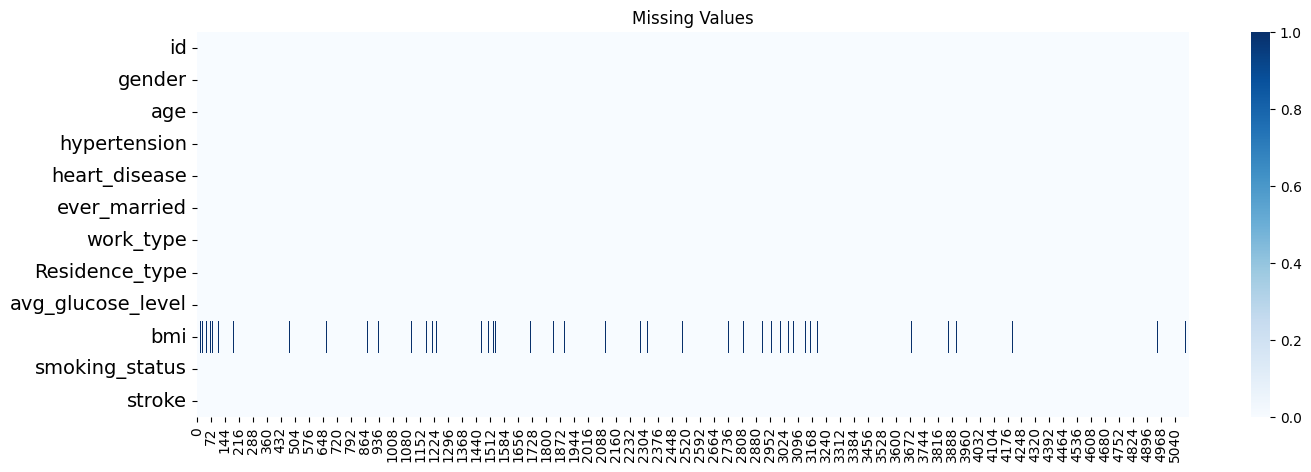

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))

sns.heatmap(data.T.isna(), cmap='Blues')
ax.set_title('Missing Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [ ]:
import missingno as msno

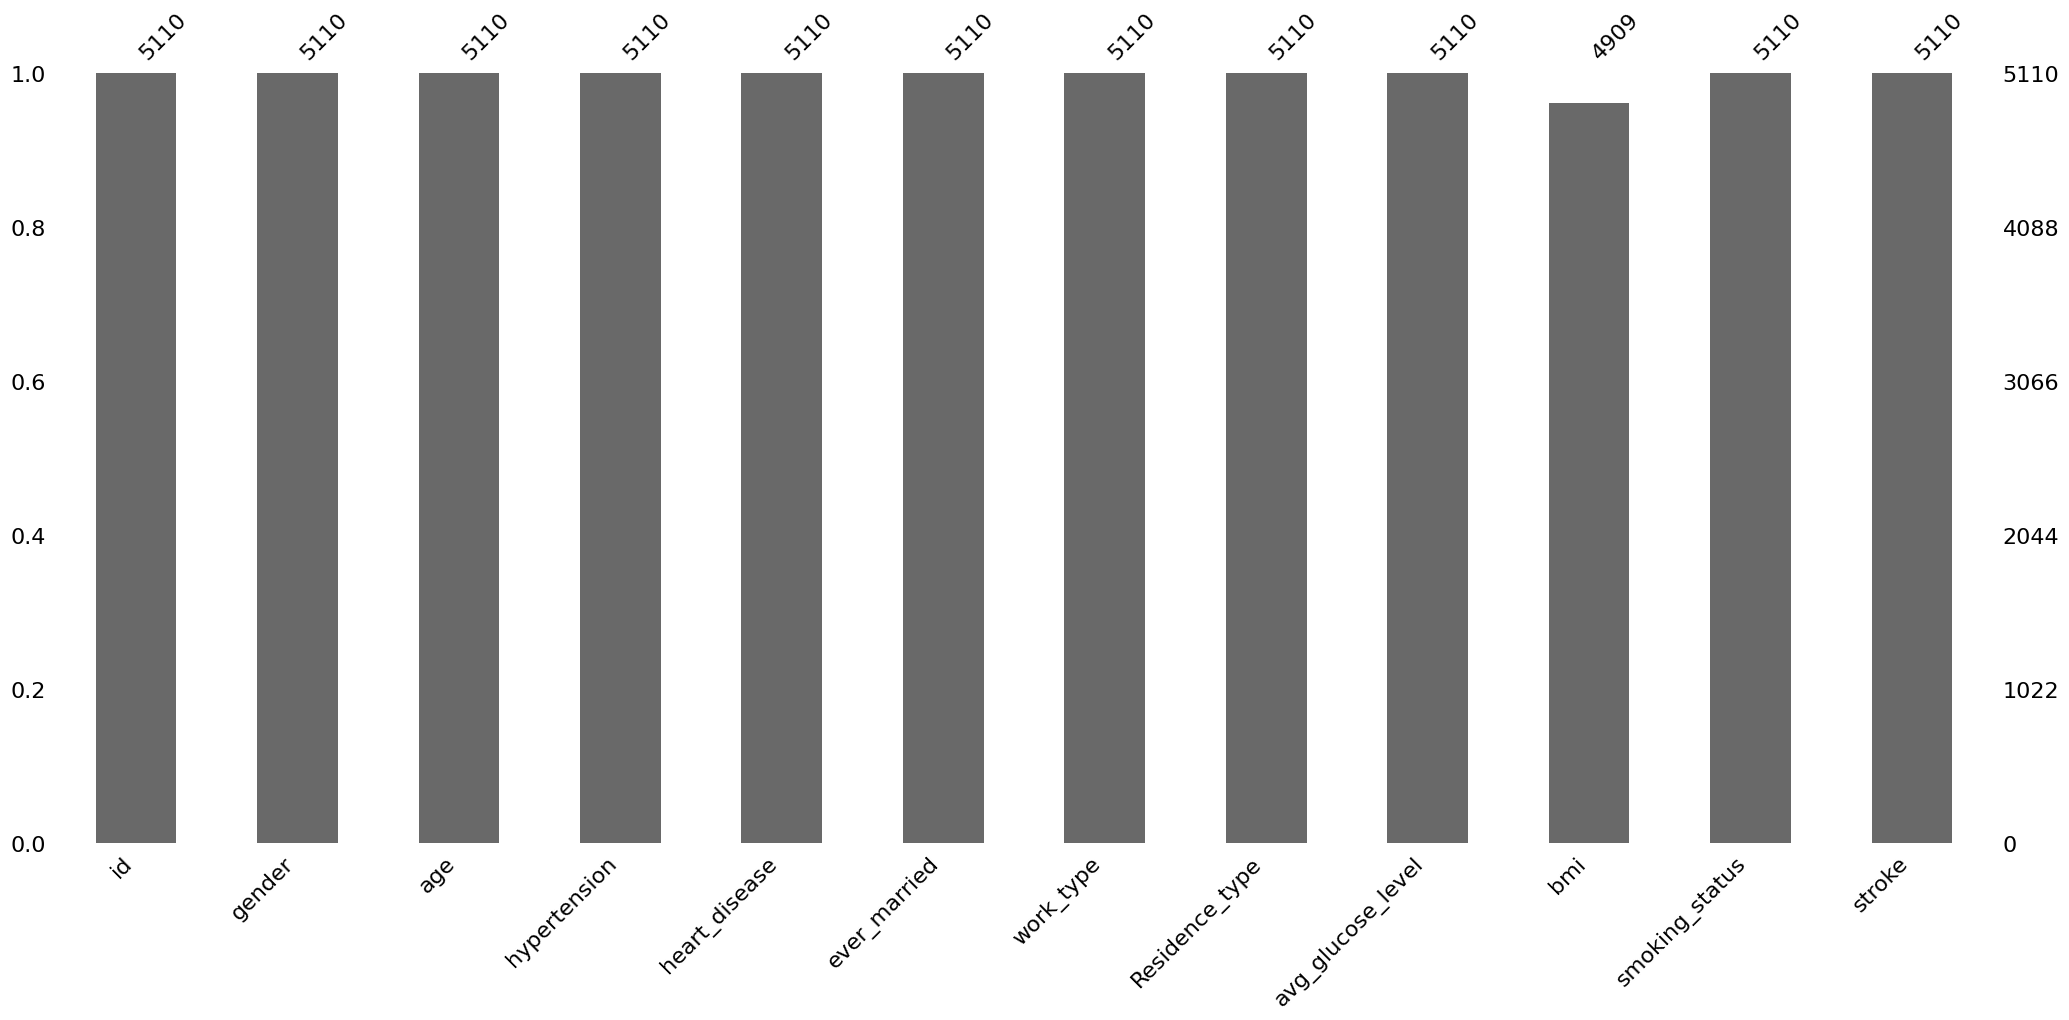

In [ ]:
msno.bar(data)
plt.show()

In [ ]:
data.bmi.replace(np.NaN, data.bmi.mean(), inplace=True)

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<ipython-input-38-e7681c4adec2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

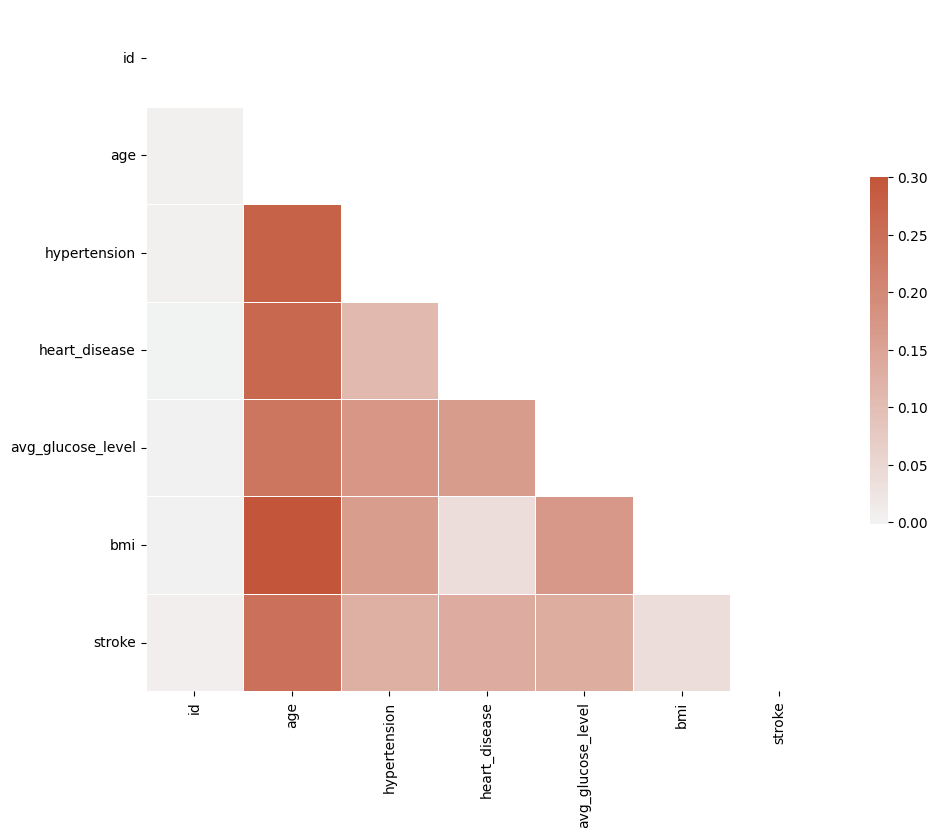

In [ ]:
# compute the corr matrix

corr = data.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

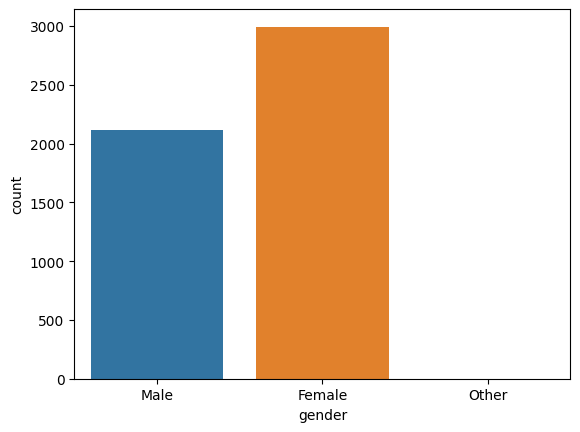

In [ ]:
print(data.gender.value_counts())
sns.countplot(data = data, x = "gender")

Yes    3353
No     1757
Name: ever_married, dtype: int64


<Axes: xlabel='ever_married', ylabel='count'>

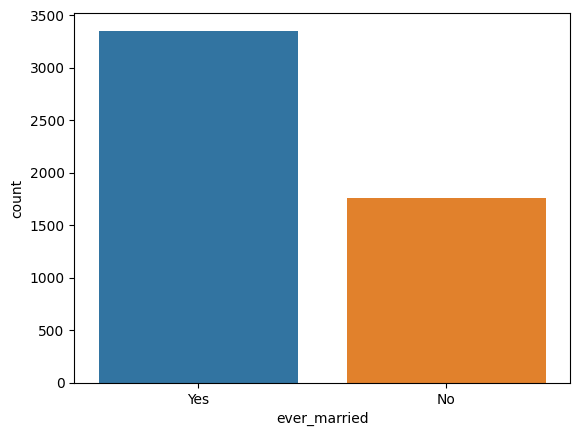

In [ ]:
print(data.ever_married.value_counts())
sns.countplot(data = data, x = "ever_married")

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<Axes: xlabel='work_type', ylabel='count'>

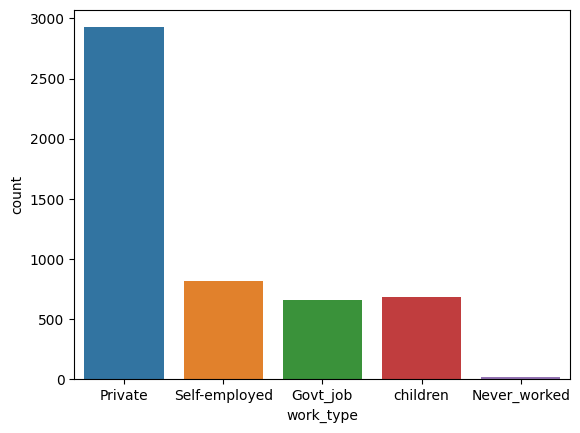

In [ ]:
print(data.work_type.value_counts())
sns.countplot(data = data, x = "work_type")

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<Axes: xlabel='Residence_type', ylabel='count'>

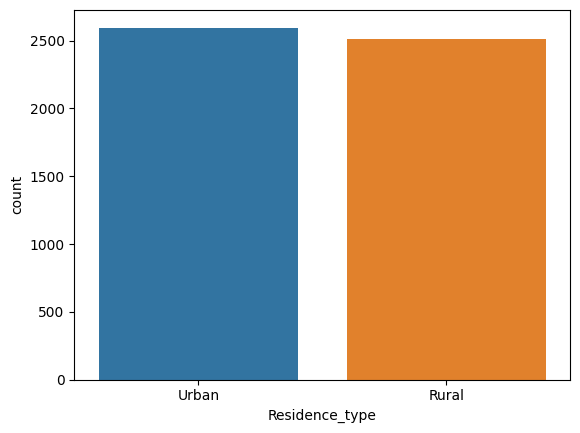

In [ ]:
print(data.Residence_type.value_counts())
sns.countplot(data = data, x = "Residence_type")

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<Axes: xlabel='smoking_status', ylabel='count'>

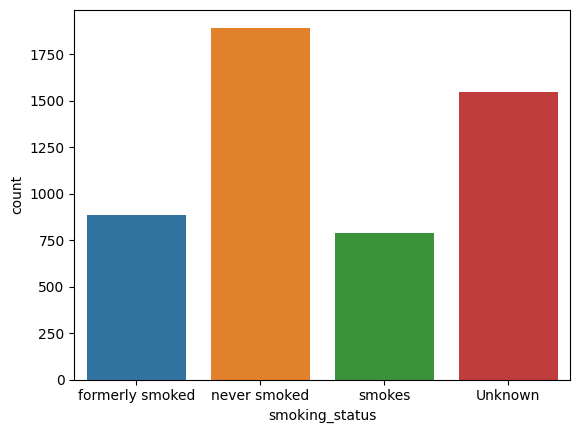

In [ ]:
print(data.smoking_status.value_counts())
sns.countplot(data = data, x = "smoking_status")

0    4861
1     249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

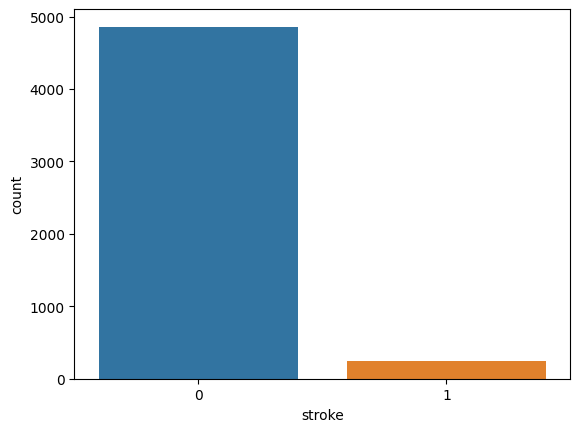

In [ ]:
print(data.stroke.value_counts())
sns.countplot(data = data, x = "stroke")

<ipython-input-50-3fefcacc2dad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)


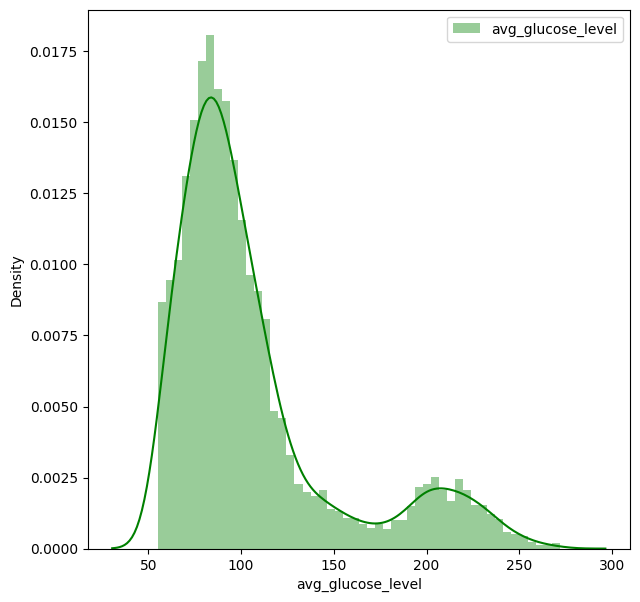

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data.avg_glucose_level,color='green',label='avg_glucose_level',kde=True)
plt.legend()

<ipython-input-51-c425170b0a23>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi,color='orange',label='bmi',kde=True)


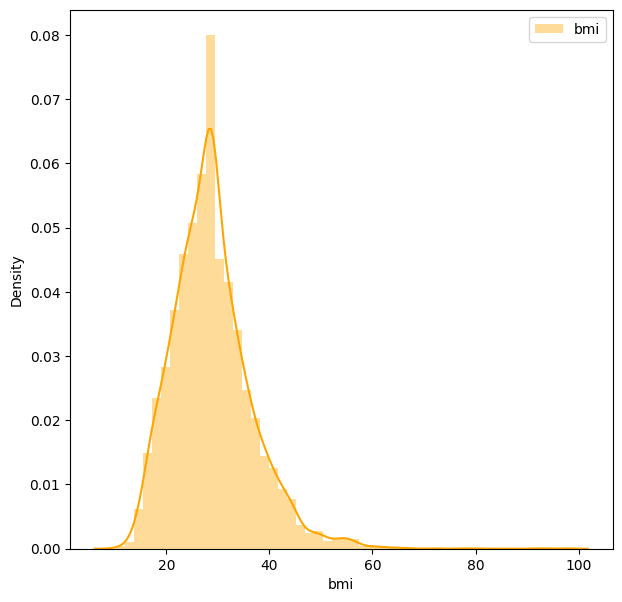

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data.bmi,color='orange',label='bmi',kde=True)
plt.legend()

<ipython-input-54-322d2c71c4b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['avg_glucose_level'],color='green')
<ipython-input-54-322d2c71c4b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['avg_glucose_level'],color='red')


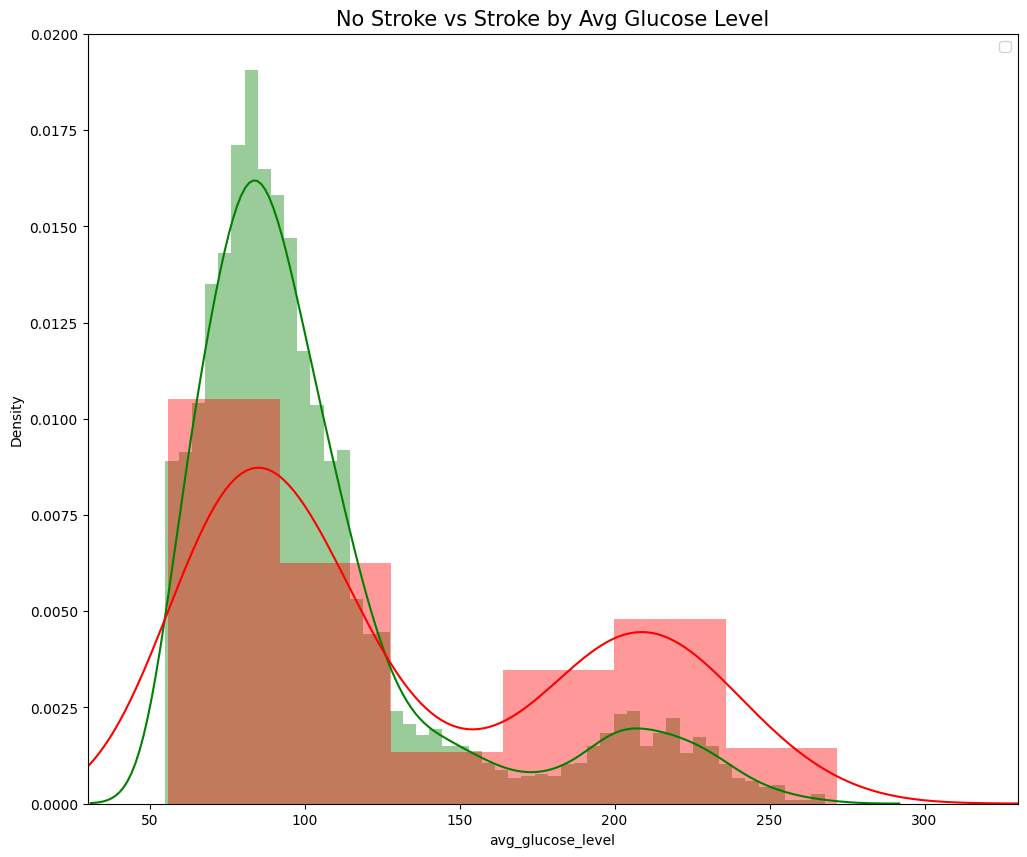

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['stroke'] == 0]['avg_glucose_level'],color='green')
sns.distplot(data[data['stroke'] == 1]['avg_glucose_level'],color='red')
plt.title('No Stroke vs Stroke by Avg Glucose Level',fontsize=15)
plt.xlim([30,330])
plt.legend()

<ipython-input-52-02f09f777bb3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['bmi'],color='green')
<ipython-input-52-02f09f777bb3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['bmi'],color='red')


(10.0, 100.0)

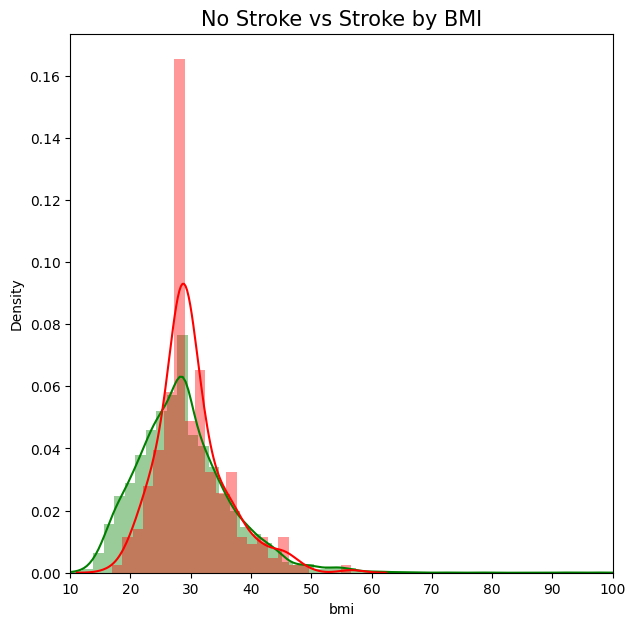

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['stroke'] == 0]['bmi'],color='green')
sns.distplot(data[data['stroke'] == 1]['bmi'],color='red')

plt.title('No Stroke vs Stroke by BMI',fontsize=15)
plt.xlim([10,100])

<ipython-input-55-714dfc6285a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 0]['age'],color='green')
<ipython-input-55-714dfc6285a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['stroke'] == 1]['age'],color='red')


(18.0, 100.0)

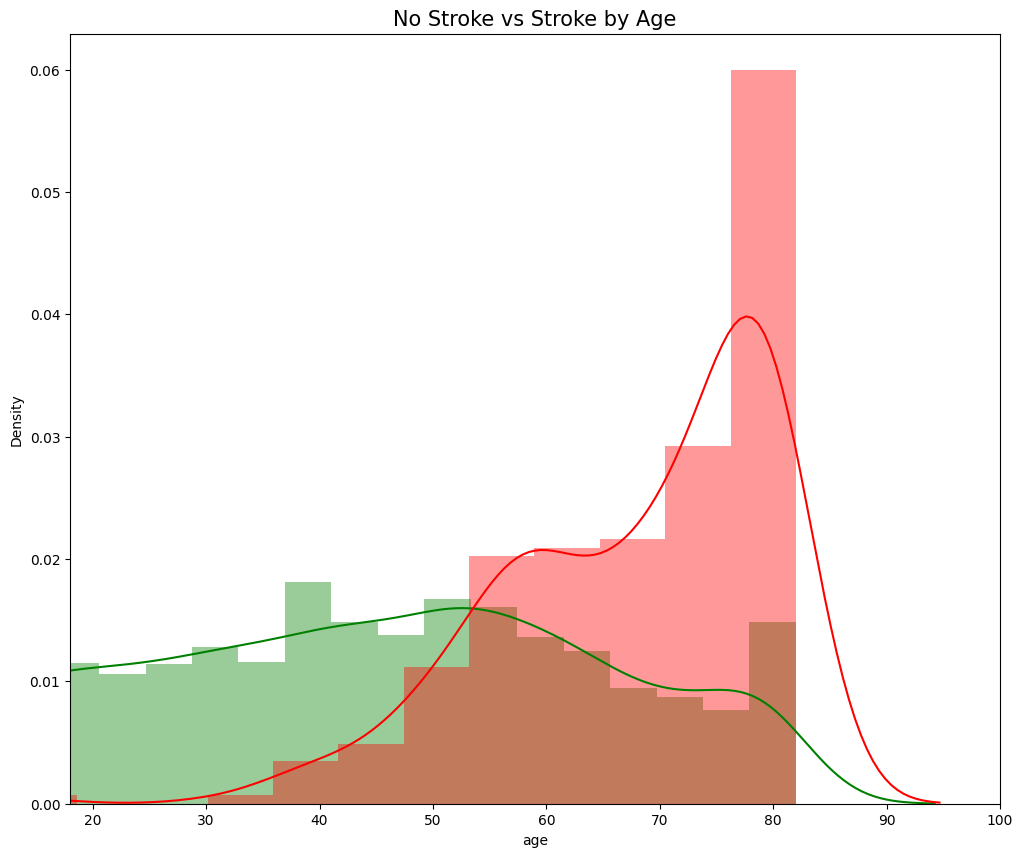

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(data[data['stroke'] == 0]['age'],color='green')
sns.distplot(data[data['stroke'] == 1]['age'],color='red')
plt.title('No Stroke vs Stroke by Age',fontsize=15)
plt.xlim([18,100])

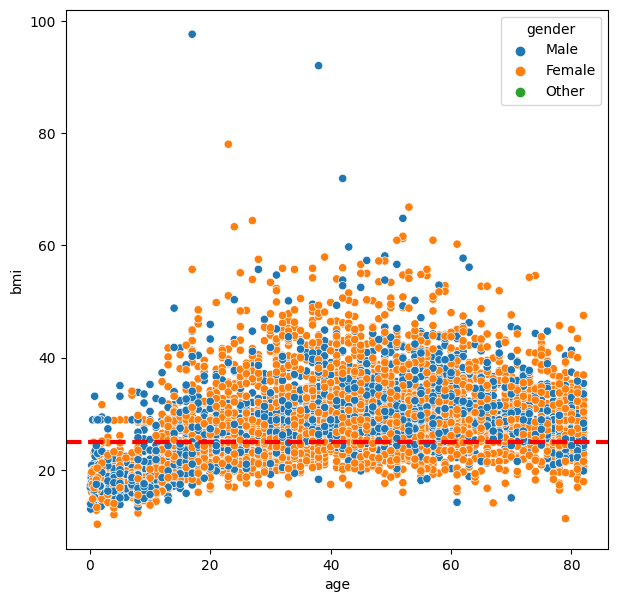

In [ ]:
plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=3,color='r',linestyle= '--')

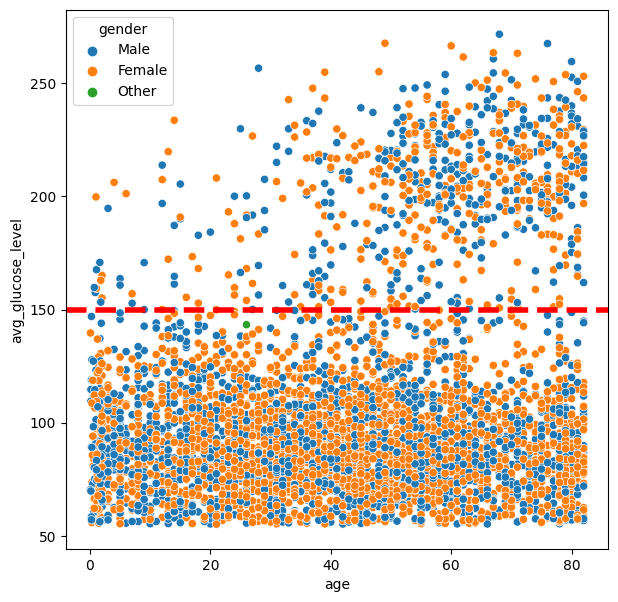

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

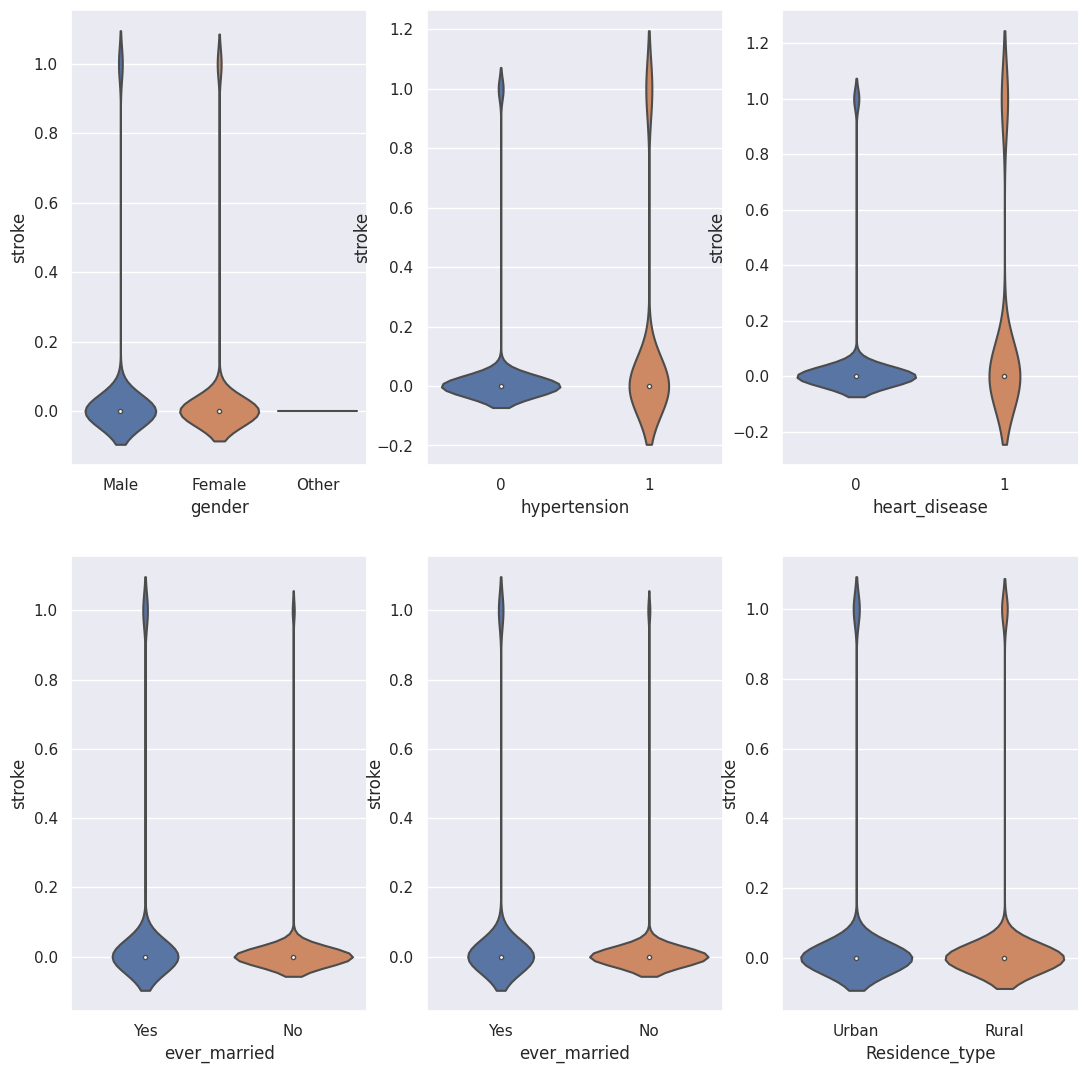

In [ ]:
plt.figure(figsize=(13,13))
sns.set_theme(style='darkgrid')
plt.subplot(2,3,1)
sns.violinplot(x='gender',y='stroke',data=data)
plt.subplot(2,3,2)
sns.violinplot(x='hypertension',y='stroke',data=data)
plt.subplot(2,3,3)
sns.violinplot(x='heart_disease',y='stroke',data=data)
plt.subplot(2,3,4)
sns.violinplot(x='ever_married',y='stroke',data=data)
plt.subplot(2,3,5)
sns.violinplot(x='ever_married',y='stroke',data=data)
plt.subplot(2,3,6)
sns.violinplot(x='Residence_type',y='stroke',data=data)
plt.show()

<Figure size 1000x1000 with 0 Axes>

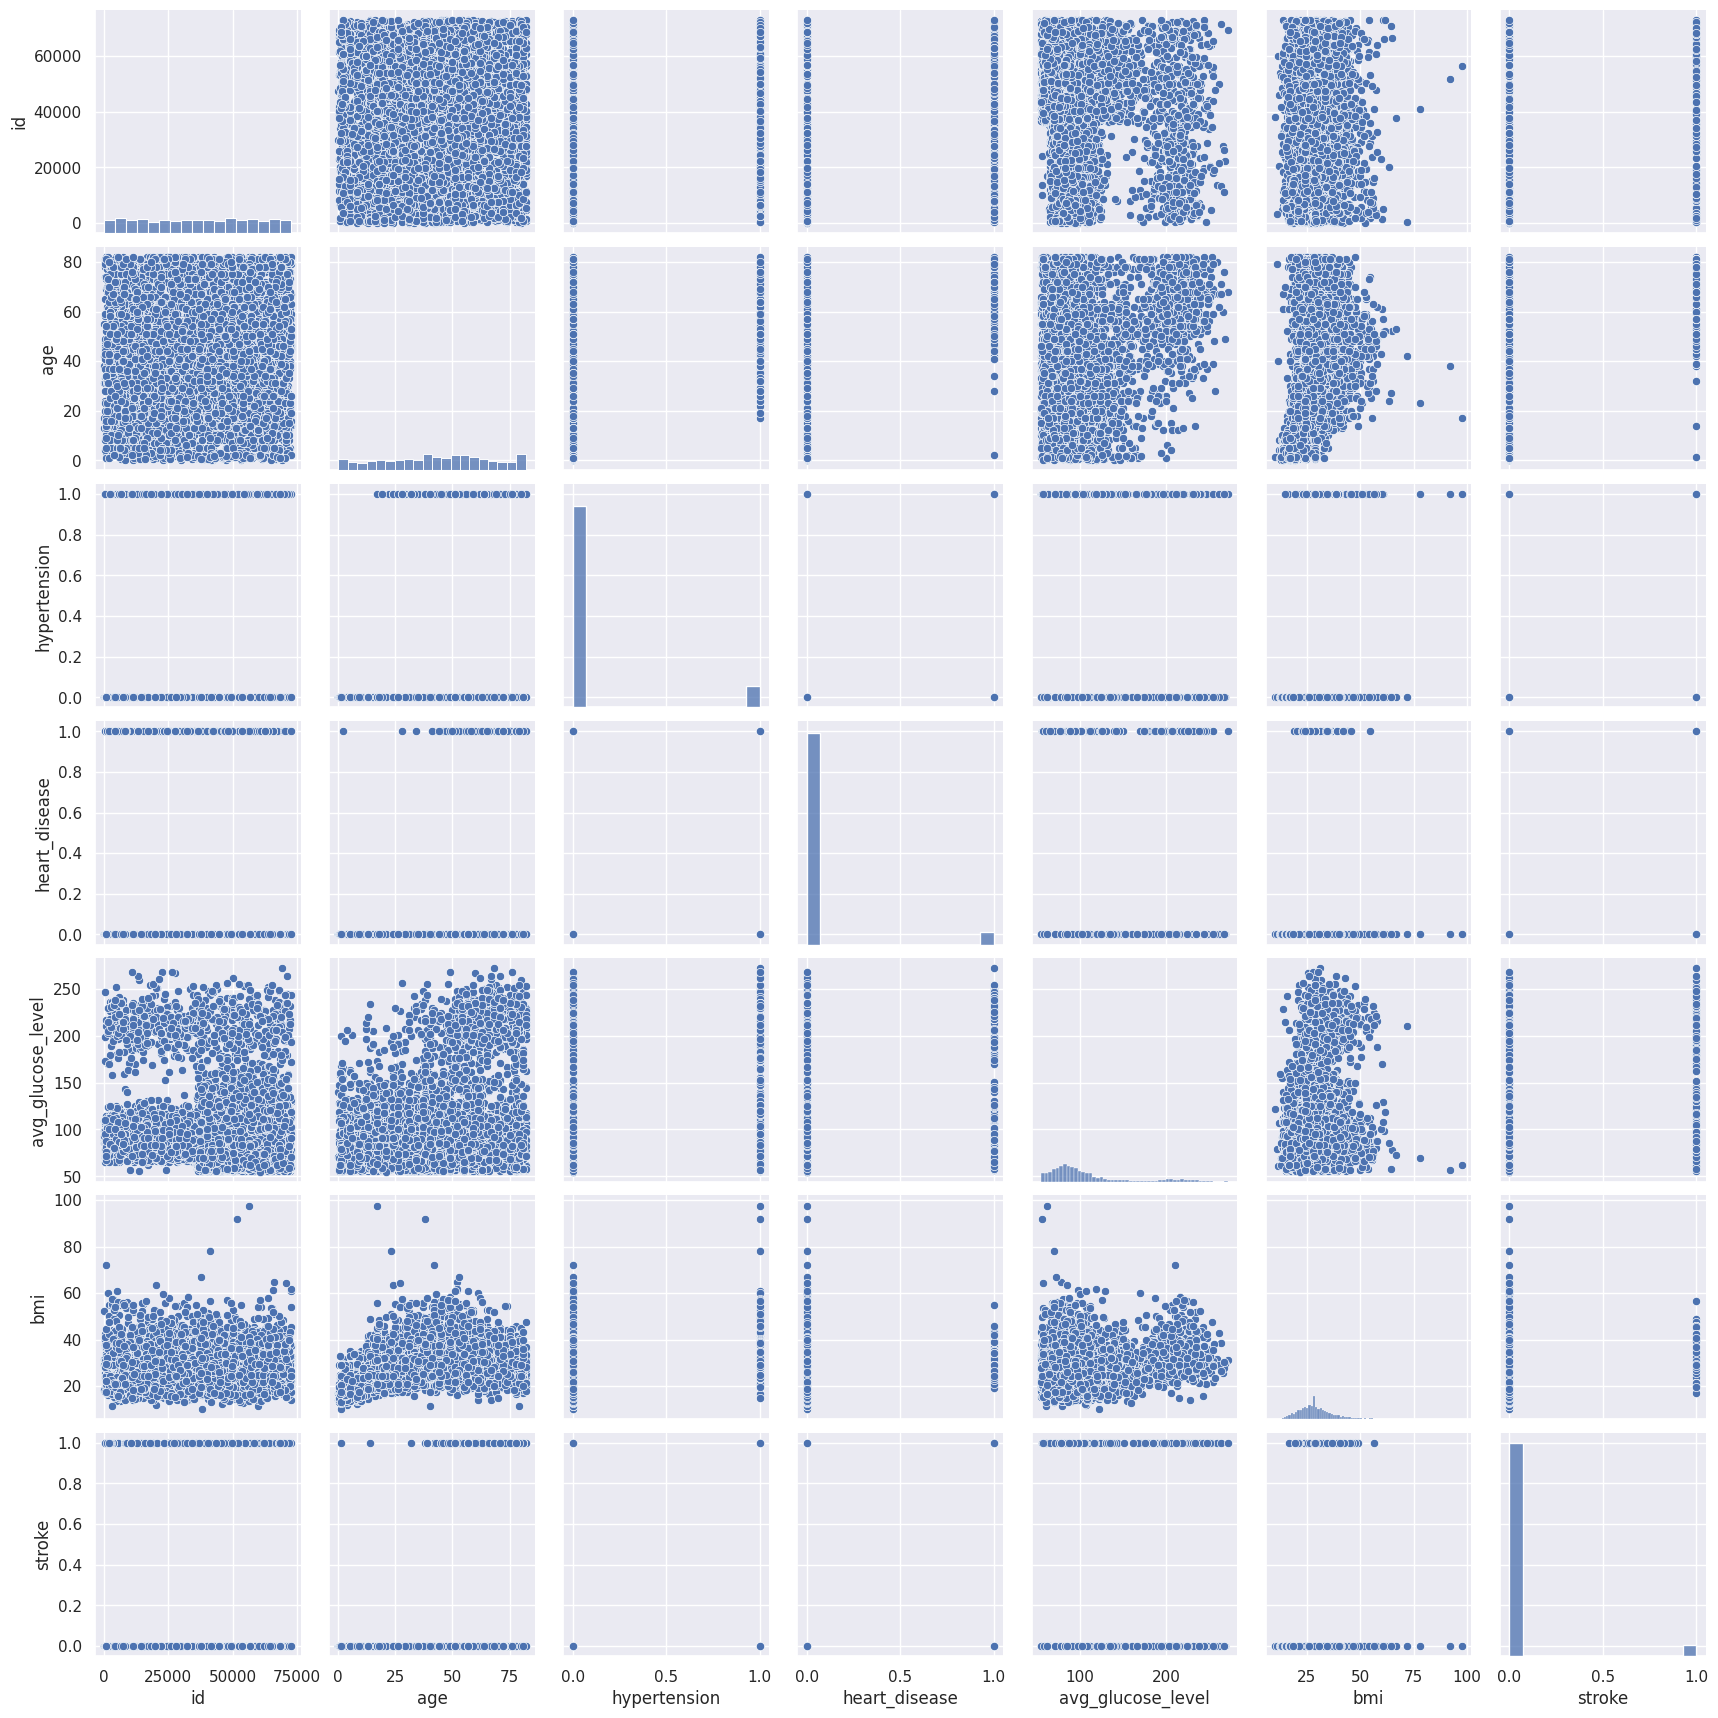

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
le = LabelEncoder()
data.gender = le.fit_transform(data.gender)
data.ever_married = le.fit_transform(data.ever_married)
data.work_type = le.fit_transform(data.work_type)
data.Residence_type = le.fit_transform(data.Residence_type)
data.smoking_status = le.fit_transform(data.smoking_status)

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(f"x_train shape {x_train.shape}\n x_test shape {x_test.shape} \n y_train shape {y_train.shape} \n y_test shape {y_test.shape}")

x_train shape (4088, 19)
 x_test shape (1022, 19) 
 y_train shape (4088,) 
 y_test shape (1022,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 19)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,auc,precision_recall_curve,average_precision_score

In [ ]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[965   3]
 [ 50   4]]
Accuracy Score:  0.9481409001956947

K-Fold Validation Mean Accuracy: 97.00 %

Standard Deviation: 7.18 %

ROC AUC Score: 0.54 %

Precision: 0.57 %

Recall: 0.07 %

F1 Score: 0.13 %
----------------------------------------



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression :
[[755 213]
 [ 15  39]]
Accuracy Score:  0.776908023483366

K-Fold Validation Mean Accuracy: 78.67 %

Standard Deviation: 1.59 %

ROC AUC Score: 0.75 %

Precision: 0.15 %

Recall: 0.72 %

F1 Score: 0.25 %
----------------------------------------

SVM :
[[696 272]
 [ 13  41]]
Accuracy Score:  0.7211350293542075

K-Fold Validation Mean Accuracy: 78.50 %

Standard Deviation: 1.88 %

ROC AUC Score: 0.74 %

Precision: 0.13 %

Recall: 0.76 %

F1 Score: 0.22 %
----------------------------------------

KNeigbors :
[[808 160]
 [ 26  28]]
Accuracy Score:  0.8180039138943248

K-Fold Validation Mean Accuracy: 89.12 %

Standard Deviation: 0.99 %

ROC AUC Score: 0.68 %

Precision: 0.15 %

Recall: 0.52 %

F1 Score: 0.23 %
----------------------------------------

GaussianNB :
[[287 681]
 [  2  52]]
Accuracy Score:  0.33170254403131116

K-Fold Validation Mean Accuracy: 64.50 %

Standard Deviation: 1.79 %

ROC AUC Score: 0.63 %

Precision: 0.07 %

Recall: 0.96 %

F1 Score: 0.13 %
-

In [ ]:
data2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

data2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
data2.head(10)

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
0,XGBClassifier,94.814090,96.995786,7.175558,0.535487,0.571429,0.074074,0.131148
7,RandomForest,94.422701,97.162683,6.762548,0.515936,0.285714,0.037037,0.065574
8,AdaBoostClassifier,93.639922,95.929855,7.080809,0.529289,0.210526,0.074074,0.109589
6,DecisionTree,89.726027,94.927664,5.821712,0.578570,0.160000,0.222222,0.186047
5,BernoulliNB,84.442270,87.092872,3.878098,0.646847,0.152318,0.425926,0.224390
3,KNeigbors,81.800391,89.121262,0.992939,0.676615,0.148936,0.518519,0.231405
1,Logistic Regression,77.690802,78.666473,1.594330,0.751090,0.154762,0.722222,0.254902
2,SVM,72.113503,78.499724,1.881722,0.739134,0.130990,0.759259,0.223433
4,GaussianNB,33.170254,64.500315,1.789182,0.629725,0.070941,0.962963,0.132147


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 
 Best Accuracy: 97.00 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 90.71 %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 95.20 %

-------------------------

 RandomForestClassifier(): 
 Best A

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.57      0.07      0.13        54

    accuracy                           0.95      1022
   macro avg       0.76      0.54      0.55      1022
weighted avg       0.93      0.95      0.93      1022

ROC AUC score: 0.785563973063973
Accuracy Score:  0.9481409001956947


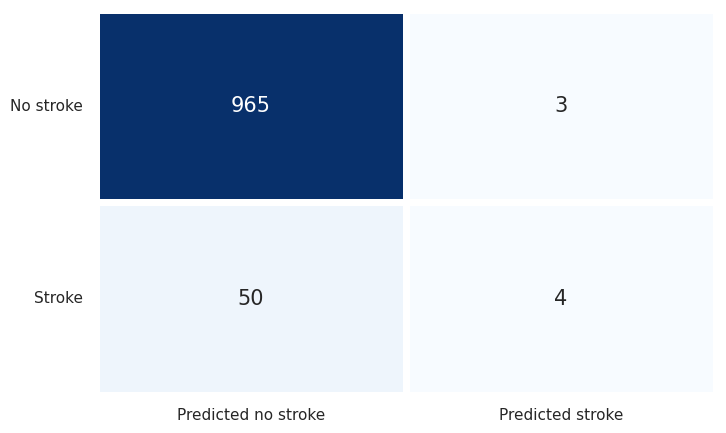

Text(0.5, 0, 'False Positive Rate')

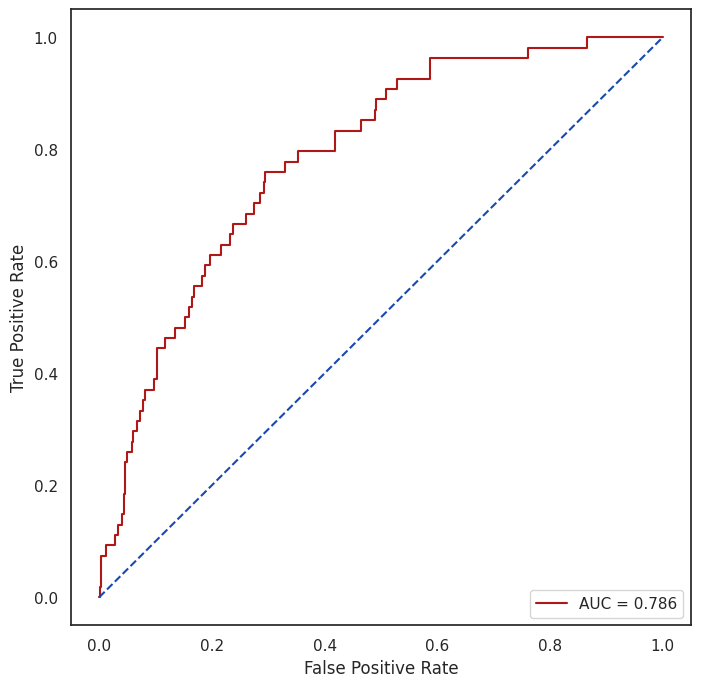

In [ ]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')